In [12]:
%matplotlib inline
import numpy as np       # linear algebra
import pandas as pd      # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, confusion_matrix
# Import any other libraries you may need such as
# average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix

In [2]:
performances = pd.read_csv('performances.csv')

In [3]:
performances.head()

,ground_truth,probability
0,1,0.99
1,1,0.98
2,1,0.97
3,1,0.96
4,1,0.95


### Exercise

In [16]:
# function to plot the roc_curve. You can utilize roc_curve and auc imported above
def plot_roc_curve(ground_truth, probability):
    ## YOUR CODE HERE
    fig, c_ax = plt.subplots(1, 1, figsize = (9,9))
    fpr, tpr, thresholds = roc_curve(ground_truth, probability)
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' % ('Pneumonia', auc(fpr, tpr)))
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')
    
# function to plot the precision_recall_curve. You can utilizat precision_recall_curve imported above
def plot_precision_recall_curve(ground_truth, probability):
    ## YOUR CODE HERE
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(ground_truth, probability)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('Pneumonia', average_precision_score(ground_truth,probability)))
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')

# function to calculate the F1 score
def calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall)

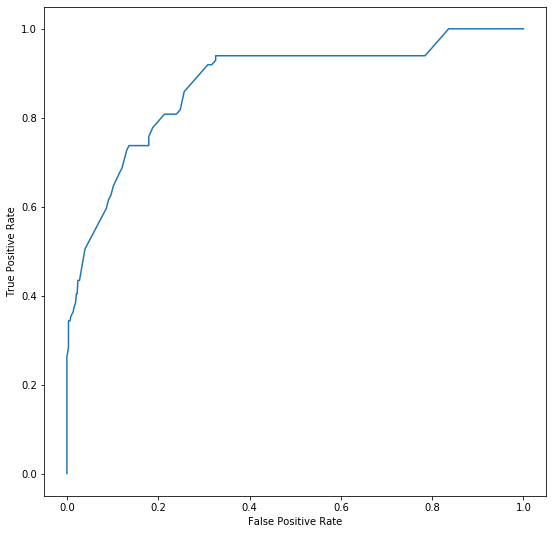

In [17]:
plot_roc_curve(performances['ground_truth'],performances['probability'])

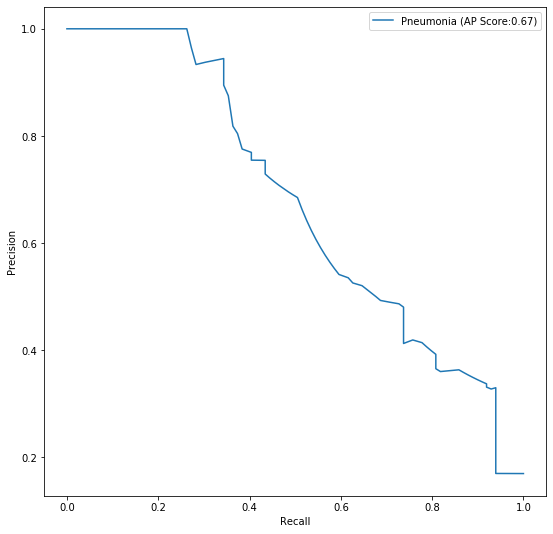

In [18]:
plot_precision_recall_curve(performances['ground_truth'],performances['probability'])

### Calculate F1 Score
Calculate F1 score for two different scenarios here, 
1. Choose a threshold that favors precision, 
2. Choose a threshold that favors recall

Print the precision, recall, threshold, and F1 score for each scenario. 

In [23]:
### YOUR CODE HERE
precision, recall, thresholds = precision_recall_curve(performances['ground_truth'],performances['probability'])

In [24]:
# Look at the threshold where precision is 0.8
precision_value = 0.8
idx = (np.abs(precision - precision_value)).argmin() 
print('Precision is: '+ str(precision[idx]))
print('Recall is: '+ str(recall[idx]))
print('Threshold is: '+ str(thresholds[idx]))
print('F1 Score is: ' + str(calc_f1(precision[idx],recall[idx])))

Precision is: 0.8043478260869565
Recall is: 0.37373737373737376
Threshold is: 0.79
F1 Score is: 0.5103448275862069


In [25]:
# Look at the threshold where recall is 0.8
recall_value = 0.8
idx = (np.abs(recall - recall_value)).argmin() 
print('Precision is: '+ str(precision[idx]))
print('Recall is: '+ str(recall[idx]))
print('Threshold is: '+ str(thresholds[idx]))
print('F1 Score is: ' + str(calc_f1(precision[idx],recall[idx])))

Precision is: 0.398989898989899
Recall is: 0.797979797979798
Threshold is: 0.39
F1 Score is: 0.531986531986532


### Examine the _accuracy_ under the two scenarios
Now look at what the _accuracy_ of our model would be using those two threshold values. **Hint, you can add a new column with value 0 or 1 as predictions based on the threshold you choose, then you can calculate accuracy using ground truth and the prediction you just made.**

Print the _accuracy_ in both the cases, and think about why accuracy really isn't a great performance statistic when evaluating and interpreting the utility of our models. 

In [ ]:
### YOUR CODE HERE 

In [26]:
probs = performances['probability']
t1 = (probs > 0.79)
t2 = (probs > 0.39)

In [27]:
t1 = t1.replace(True,1).replace(False,0)
t2 = t2.replace(True,1).replace(False,0)

In [28]:
compare_t1 = (t1 == performances['ground_truth'])
compare_t2 = (t2 == performances['ground_truth'])

In [29]:
print('Accuracy at threshold 1: ' + str(len(compare_t1[compare_t1])/len(performances)))

Accuracy at threshold 1: 0.8954344624447718


In [30]:
print('Accuracy at threshold 2: ' + str(len(compare_t2[compare_t2])/len(performances)))

Accuracy at threshold 2: 0.801178203240059
